<a href="https://colab.research.google.com/github/matthewhawksby/MatthewHawksbyGithub/blob/main/Weekly_Activity_Sound_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Credit: This notebook was prepared by
 Payam Jome Yazdian (Rosie Lab)*

## Import Dependencies

In [65]:
!pip install soundfile
import numpy as np
import scipy.io.wavfile as wavef
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
from IPython.display import Audio

from google.colab import drive
import soundfile as sf

# Task 1. Generate a sound:
A single-frequency sound wave with frequency f, maximum amplitude A, and phase θ is represented by the sine function

y=Asin(2πfx+θ)

where x is time and y is the amplitude of the sound wave at time x.

Given the formalization above, complete the following function *mkwave* so as to generate a sine wave signal with a specific duration, amplitude, frequency (Hz), phase, and sampling rate.

Play around with the parameters and answer the following questions in Canvas:    

1.   What is the relationship between frequency (Hz) and the perception of the resulting sound?
2.   What is the relationship between the length of a sound and sampling rate?
3.   How does sampling rate affect the sound?
4.   How does phase affect the sound?

For more information about sampling rate please check [this](https://en.wikipedia.org/wiki/Compact_Disc_Digital_Audio).

<Figure size 640x480 with 0 Axes>

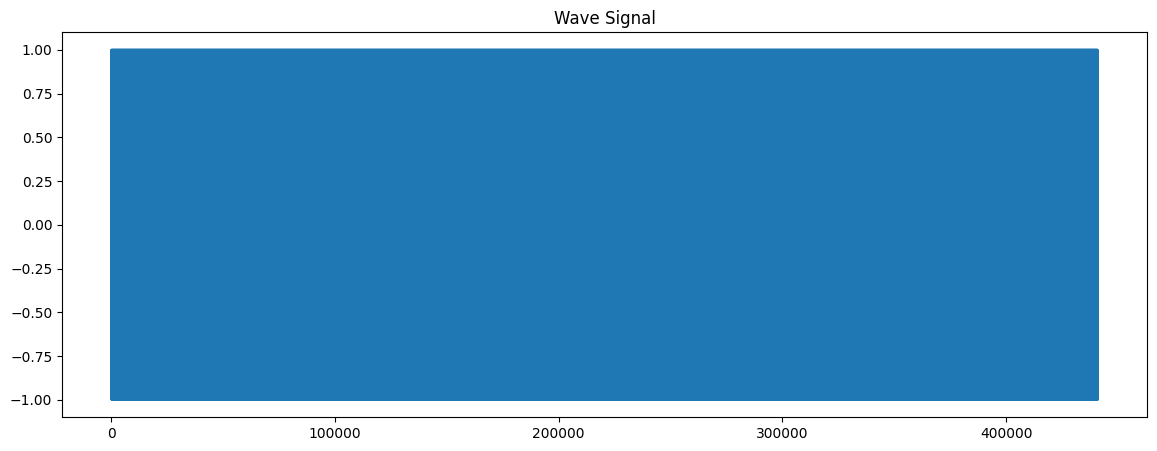

In [66]:
def mkwave(duration_sec, amp, freq_hz, phase, sampling_rate=44100):
    x = np.arange(0.0, duration_sec, 1.0/sampling_rate) # start, stop, step
    y = amp*np.sin(2*np.pi*freq_hz*x+phase)
    return y

target_freq_hz =  300
sampling_rate = 44100
duration = 10.0
amplitude = 1.0
phase = 1

wav = mkwave(duration, amplitude, target_freq_hz, phase, sampling_rate)

#Plot signal
plt.figure(1)
plt.figure(figsize=(14, 5))
plt.title("Wave Signal")
plt.plot(wav)
plt.show()

#Play audio
ipd.display(ipd.Audio(data=wav, rate=sampling_rate))

# Write to a file
wavef.write("example.wav", sampling_rate, wav)


## Task 2. Visualize a wave signal
- In this part you must implement a part of code which visualizes the following plots of generated signal by previous section.
-- spectrum

Hint: You may use the librosa's [feature](https://librosa.org/doc/main/feature.html) class.

Post a picture of your spectrogram in Canvas, and answer the following question.

What does the spectrogram allow us to see, with respect to the parameters you set in Step 1?


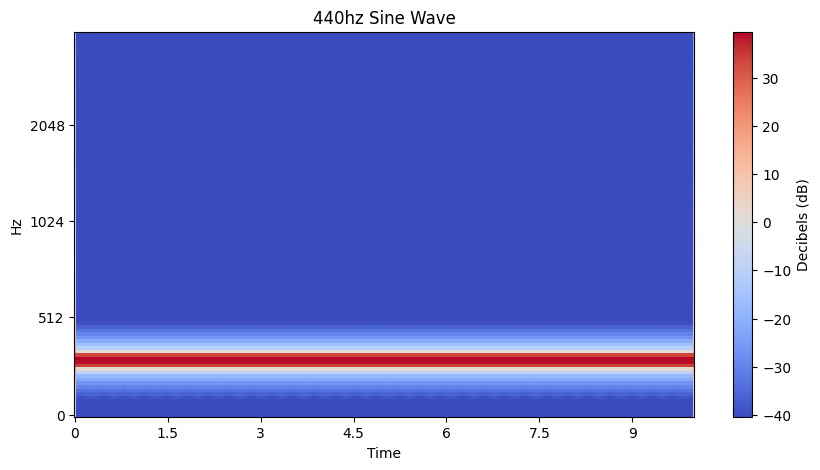

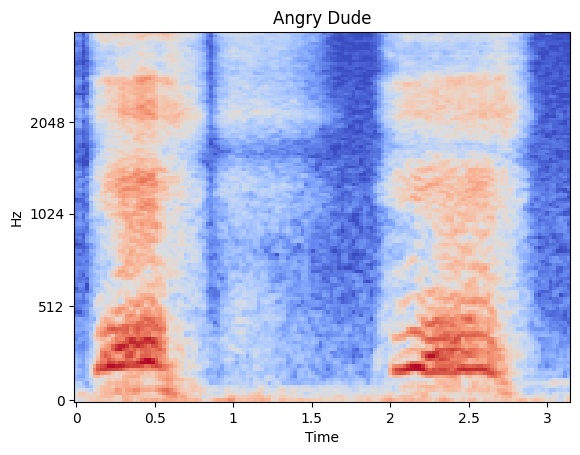

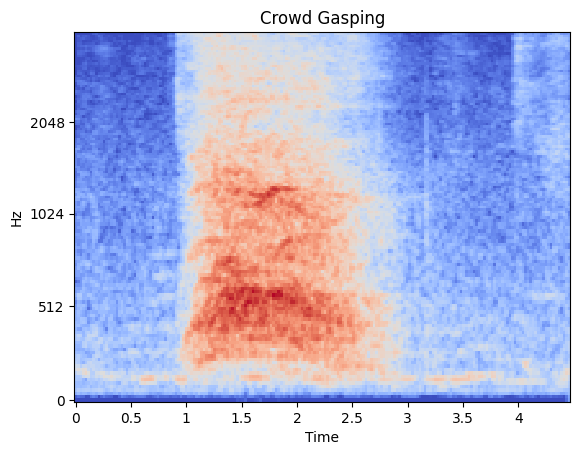

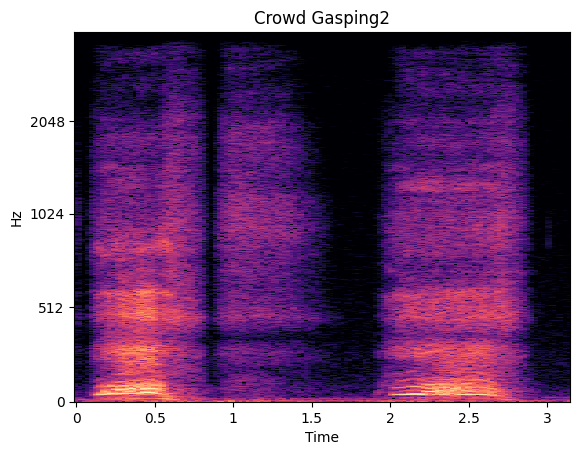

In [75]:
# plot spectogram:
# ...

audio, sampling = librosa.load("/content/drive/MyDrive/angry.wav")
audio2, sampling2 = librosa.load("/content/drive/MyDrive/crowdgasping.wav")

mel_spectrogram = librosa.feature.melspectrogram(y=wav, sr=sampling_rate, fmax=4000)
mel_spec_db = librosa.power_to_db(mel_spectrogram)

mel_spectrogram2 = librosa.feature.melspectrogram(y=audio, sr=sampling, n_mels=128, fmax=4000)
mel_spec_db2 = librosa.power_to_db(mel_spectrogram2)

mel_spectrogram3 = librosa.feature.melspectrogram(y=audio2, sr=sampling2, n_mels=128, fmax=4000)
mel_spec_db3 = librosa.power_to_db(mel_spectrogram3)

stft_spec = librosa.stft(audio)

# Convert to dB scale for better visualization
stft_db = librosa.amplitude_to_db(np.abs(stft_spec), ref=np.max)

# Plot Mel spectrogram
plt.figure(figsize=(10, 5))
librosa.display.specshow(mel_spec_db, sr=sampling_rate, x_axis='time', y_axis='mel', fmax=4000)
plt.colorbar(label="Decibels (dB)")
plt.title("440hz Sine Wave")
plt.show()

librosa.display.specshow(mel_spec_db2, sr=sampling, x_axis='time', y_axis='mel', fmax=4000)
plt.title("Angry Dude")
plt.show()

librosa.display.specshow(mel_spec_db3, sr=sampling2, x_axis='time', y_axis='mel', fmax=4000)
plt.title("Crowd Gasping")
plt.show()

librosa.display.specshow(stft_db, sr=sampling2, x_axis='time', y_axis='mel', fmax=4000)
plt.title("Crowd Gasping2")
plt.show()

# Task 3. Plot the spectrum of 2 wave files of your choice

Find or record at least 2 short [affect bursts](https://www.sciencedirect.com/science/article/pii/S016763930200078X?casa_token=bdo4xIj0JXYAAAAA:zJkZiqBgxB9MJbNtZyBPBD5kVZzfpS8MUXJGAlLmhyPHrXtu0_uimWsfEZKFc9rnJhHX83FtZw), such as "oooOOOOoo" or "ah!" or "awwww", representing an emotion(s). For example, what sound could you use to express disgust or awe?

### Load an audio file from Google Drive:
This allows you to work in CoLab without needing to upload your data at each runtime
-  First, open the file browser on the left hand side. It will show a **'Mount Drive'** button similar to the Google Drive Icon.
- Once clicked, you'll see a permissions prompt to mount Drive, and then your Drive files will be present.
- Afterward, look for your intended file, right-click on that, and click "Copy path".
- Finally, paste it in your code (inspired from the above) instead of *myfile.wav*

### OR, load an audio file locally
- If using Jupyter Notebook offline, simply paste the path to the file

Note: You can download a sample from https://freesound.org/ or record your own.

Post the picture of your spectrums in Canvas and answer the following questions.

1. What sounds did you choose?
2. Describe what you see in the spectrum(s). What formants do you see?
3. Any other comments on this activity.

In [67]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
